<a href="https://colab.research.google.com/github/LauraAlejandraFuentesArevalo/DS_Laura_Alejandra_Fuentes/blob/main/Clase11_Oct19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn import metrics
import matplotlib.pyplot as plt

In [15]:
ruta = "/content/drive/MyDrive/Colab Notebooks/data_set/claseOct12.csv"
#df = pd.read_csv(ruta)
df = pd.read_csv(filepath_or_buffer=ruta)
print(df["Date"].head(10))
print(df["Date"].tail(10))
print("df.shape",df.shape)

0    2008-12-01
1    2008-12-02
2    2008-12-03
3    2008-12-04
4    2008-12-05
5    2008-12-06
6    2008-12-07
7    2008-12-08
8    2008-12-09
9    2008-12-10
Name: Date, dtype: object
145450    2017-06-16
145451    2017-06-17
145452    2017-06-18
145453    2017-06-19
145454    2017-06-20
145455    2017-06-21
145456    2017-06-22
145457    2017-06-23
145458    2017-06-24
145459    2017-06-25
Name: Date, dtype: object
df.shape (145460, 23)


In [36]:
#filtered_df = df.loc[(df['Date'] >= '2016-12-01') & (df['Date'] < '2017-02-28')]
filtered_df = df.loc[((df['Date'] >= '2016-12-01') & (df['Date'] < '2017-02-28')) | ((df['Date'] >= '2015-12-01') & (df['Date'] < '2016-02-28'))|((df['Date'] >= '2014-12-01') & (df['Date'] < '2015-02-28'))]

print("filtered_df.shape", filtered_df.shape)

filtered_df.shape (13083, 23)


In [37]:
filtered_df.shape

(13083, 23)

In [38]:
filtered_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,12841.000000,12848.000000,12590.000000,6060.00000,5280.000000,12235.000000,12920.000000,12603.000000,12805.000000,12317.000000,11495.000000,11499.000000,7513.000000,6872.000000,12863.000000,12369.000000
mean,17.168772,29.109963,2.638824,8.63670,8.984261,42.472007,14.852786,19.605015,63.644123,46.834456,1013.615520,1011.372798,4.855184,4.506112,22.157848,27.163303
std,5.033699,5.937798,9.802584,5.33203,3.996541,11.687925,8.486951,8.297342,18.625960,21.722847,5.393709,5.564042,2.832482,2.780626,5.127399,5.933079
min,-1.600000,8.800000,0.000000,0.00000,0.000000,7.000000,0.000000,0.000000,4.000000,1.000000,989.600000,981.900000,0.000000,0.000000,0.700000,4.600000
25%,13.700000,24.700000,0.000000,5.80000,6.500000,35.000000,9.000000,13.000000,53.000000,29.000000,1009.900000,1007.400000,2.000000,2.000000,18.300000,22.900000
50%,17.200000,29.000000,0.000000,8.00000,10.300000,41.000000,13.000000,19.000000,65.000000,47.000000,1013.500000,1011.200000,6.000000,5.000000,22.000000,26.900000
75%,20.800000,33.300000,0.400000,10.40000,12.300000,48.000000,20.000000,24.000000,76.000000,62.000000,1017.200000,1015.300000,7.000000,7.000000,25.900000,31.300000
max,31.900000,47.300000,247.200000,145.00000,14.500000,122.000000,130.000000,61.000000,100.000000,100.000000,1032.800000,1031.500000,8.000000,8.000000,37.600000,46.700000


In [39]:
filtered_df.isnull().sum()

Date                0
Location            0
MinTemp           242
MaxTemp           235
Rainfall          493
Evaporation      7023
Sunshine         7803
WindGustDir       848
WindGustSpeed     848
WindDir9am        508
WindDir3pm        508
WindSpeed9am      163
WindSpeed3pm      480
Humidity9am       278
Humidity3pm       766
Pressure9am      1588
Pressure3pm      1584
Cloud9am         5570
Cloud3pm         6211
Temp9am           220
Temp3pm           714
RainToday         493
RainTomorrow      492
dtype: int64

In [40]:
filtered_df=filtered_df.dropna()

In [41]:
filtered_df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [42]:
filtered_df.keys()

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [47]:
df2=filtered_df[["WindSpeed9am",'Humidity9am', 'Pressure9am','Temp9am']].copy()
df2

,WindSpeed9am,Humidity9am,Pressure9am,Temp9am
14138,28.0,51.0,1012.7,23.1
14139,31.0,43.0,1013.8,25.6
14140,31.0,42.0,1015.9,26.7
14145,26.0,76.0,1008.4,25.6
14146,22.0,63.0,1012.7,26.8
...,...,...,...,...
142180,13.0,75.0,1011.7,29.2
142181,13.0,73.0,1010.2,29.3
142182,7.0,79.0,1011.4,29.4
142183,2.0,82.0,1011.7,28.4


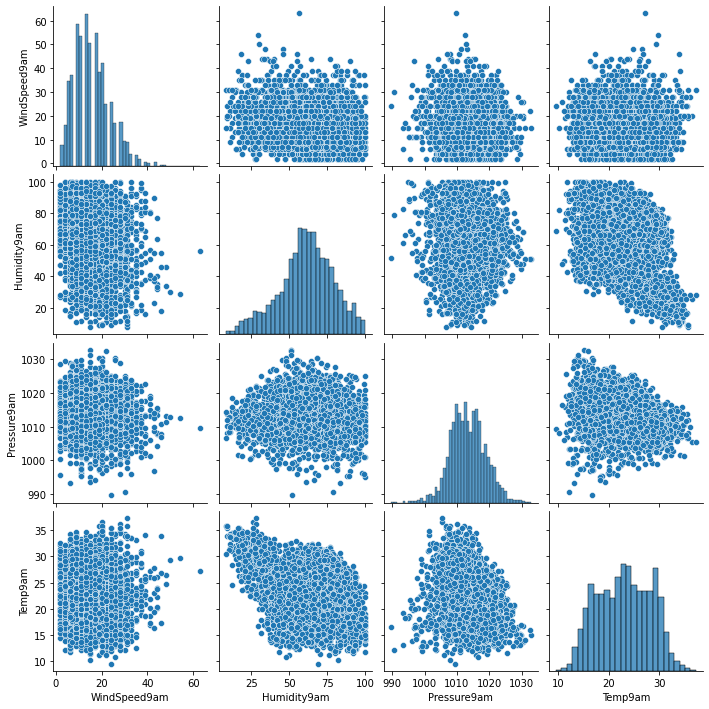

In [48]:
sns.pairplot(df2)

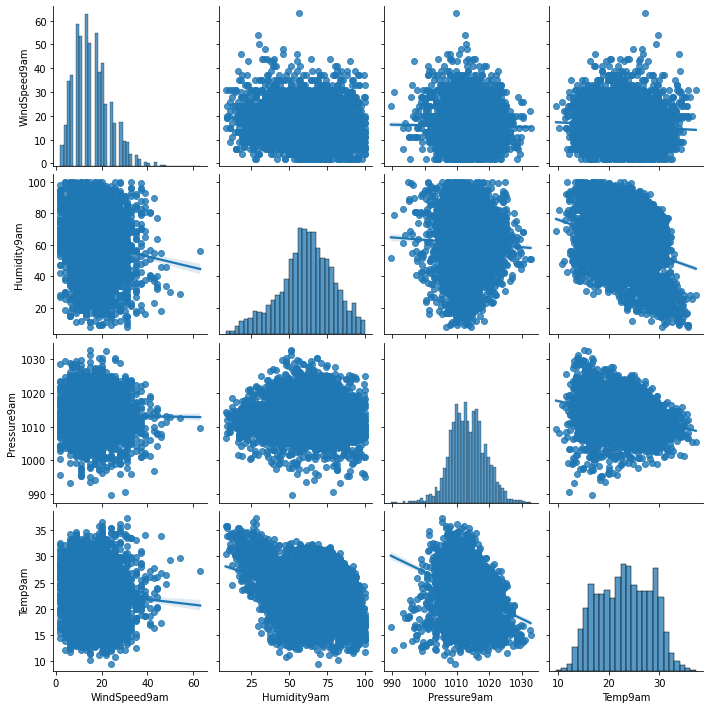

In [49]:
sns.pairplot(df2, kind="reg")


In [50]:
y = df2['Temp9am']
X = df2[['Humidity9am', 'Pressure9am', 'WindSpeed9am']]


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [52]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3229, 3) (808, 3) (3229,) (808,)


In [53]:
X_train

,Humidity9am,Pressure9am,WindSpeed9am
141752,85.0,1008.2,4.0
66267,91.0,1009.3,19.0
39002,50.0,1016.4,15.0
38683,54.0,1015.5,26.0
80490,65.0,1018.7,11.0
...,...,...,...
38682,51.0,1015.1,19.0
123321,49.0,1019.1,13.0
77497,62.0,1023.4,11.0
102030,48.0,1008.9,26.0


In [54]:
X_test

,Humidity9am,Pressure9am,WindSpeed9am
77480,76.0,1011.1,17.0
23609,87.0,1013.3,24.0
80861,48.0,1009.9,13.0
138252,28.0,1011.3,20.0
108070,52.0,1012.6,28.0
...,...,...,...
66637,42.0,1010.0,30.0
77421,81.0,1016.9,19.0
86268,65.0,1008.6,7.0
66350,84.0,1011.1,11.0


In [55]:
lineal = LinearRegression()
lineal

LinearRegression()

In [56]:
lineal.fit(X_train, y_train)

LinearRegression()

In [57]:
lineal.coef_.tolist()

[-0.1057622647765509, -0.3000693612278871, -0.09743663549984505]

In [58]:
y_pred_train_lineal = lineal.predict(X_train)
y_pred_train_lineal

array([23.12773185, 20.70153243, 23.29703936, ..., 20.3171532 ,
       24.68728111, 24.65052599])

In [59]:
y_pred_test_lineal = lineal.predict(X_test)
y_pred_test_lineal

array([21.94271482, 19.43712086, 25.65388801, 26.66697975, 22.95910214,
       21.84962098, 22.71736446, 20.48924875, 19.66929582, 21.41192687,
       25.81467004, 20.82348124, 21.84618799, 20.52657005, 23.6232539 ,
       21.72164717, 21.87342957, 26.760211  , 21.74083487, 28.219738  ,
       23.99662093, 22.62474857, 25.87075027, 24.89561152, 26.96500696,
       22.4191147 , 21.100701  , 26.60377813, 21.01947053, 23.97127083,
       23.06261604, 21.26565248, 22.26521826, 20.30946563, 21.5775164 ,
       22.33469012, 25.27126286, 24.28448657, 24.38482597, 21.39661417,
       23.58045746, 22.16388393, 21.81266292, 19.35700313, 21.33035277,
       22.71623211, 22.66459306, 26.8196587 , 17.59047527, 23.89929212,
       24.92716632, 18.89987608, 19.87870631, 23.63374276, 22.54925174,
       23.72935979, 23.54946195, 21.90032753, 26.13983737, 21.73651477,
       29.04846166, 22.67221818, 28.45846817, 22.50118945, 21.49317695,
       25.8580459 , 22.88650806, 22.66605579, 22.32140633, 23.74

In [60]:
metrics.mean_squared_error(y_train,y_pred_train_lineal)

20.85850939846173

In [61]:
metrics.mean_squared_error(y_test,y_pred_test_lineal)

20.196593671204585

In [62]:
metrics.mean_absolute_error(y_train,y_pred_train_lineal)

3.8073550503993996

In [63]:
y_error_train = y_train - y_pred_train_lineal
y_error_train

141752    4.472268
66267    -5.101532
39002    -2.997039
38683     2.327750
80490    -3.610192
            ...   
38682     1.908379
123321   -4.187488
77497    -4.817153
102030   -0.987281
105024   -2.550526
Name: Temp9am, Length: 3229, dtype: float64

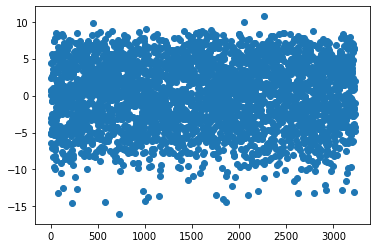

In [64]:
plt.scatter(x = range(len(y_error_train)), y=y_error_train)

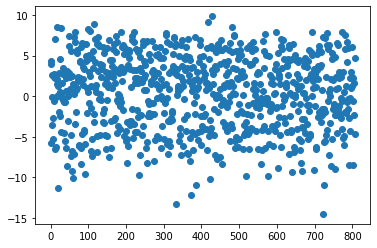

In [65]:
y_error_test = y_test - y_pred_test_lineal
plt.scatter(x = range(len(y_error_test)), y=y_error_test)